In [1]:
library(rgdal)

Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [2]:
shp.path <- "/Users/dongmeichen/Documents/beetle/shp"

In [3]:
out <- "/Users/dongmeichen/Documents/defense/figures/"

In [4]:
na10km_land <- readOGR(dsn=shp.path, layer="na10km_land")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_land"
with 1 features
It has 2 fields


In [5]:
na10km_mask_pts <- readOGR(dsn=shp.path, , layer='na10km_mask_pts')

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_mask_pts"
with 277910 features
It has 3 fields


In [25]:
proj4string(na10km_mask_pts) <- proj4string(na10km_land)

In [27]:
png(paste0(out, "na10km_land.png"), width=6, height=6, units="in", res=300)
par(mar = c(0,0,0,0))
plot(na10km_land)
points(na10km_mask_pts, cex=0.05, pch=16)
dev.off()

pdf 
  2

In [10]:
na10km_roi <- readOGR(dsn=shp.path, layer="na10km_roi")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_roi"
with 77369 features
It has 25 fields
Integer64 fields read as strings:  prs_1997 prs_1998 prs_1999 prs_2000 prs_2001 prs_2002 prs_2003 prs_2004 prs_2005 prs_2006 prs_2007 prs_2008 prs_2009 prs_2010 prs_2011 prs_2012 prs_2013 prs_2014 prs_2015 prs_2016 allyears hosts 


In [23]:
png(paste0(out, "na10km_roi.png"), width=6, height=6, units="in", res=300)
par(mar = c(0,0,0,0))
plot(na10km_land)
points(na10km_roi, cex=0.05, pch=16)
dev.off()

pdf 
  2

In [32]:
mpb10km_us_gridpts <- readOGR(dsn=shp.path, layer="mpb10km_us_gridpts")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km_us_gridpts"
with 36965 features
It has 3 fields


In [33]:
mpb10km_us_gridpts <- spTransform(mpb10km_us_gridpts, CRS(proj4string(na10km_land)))

In [35]:
png(paste0(out, "mpb10km.png"), width=6, height=6, units="in", res=300)
par(mar = c(0,0,0,0))
plot(na10km_land)
points(mpb10km_us_gridpts, cex=0.05, pch=16)
dev.off()

pdf 
  2

In [6]:
path <- "/Users/dongmeichen/Documents/beetle/data/"
data <- read.csv(paste0(path, "longterm_bioclim_mean.csv"))
tmean <- subset(data,var=="Tmean")
summerP2 <- subset(data,var=="summerP2")
btl.grids <- read.csv(paste0(path, "beetle_grids_time.csv"))
na.df <- data.frame(time=1902:1996, btl.t=rep(NA, 95))
btl.grids <- rbind(na.df, btl.grids[,c("time", "btl.t")])[-115,]
out <- "/Users/dongmeichen/Documents/defense/figures/"

In [37]:
shade.where.greater <- function(x, y1, y2) {
  # y1 should be the vector where shading occurs if greater
  n <- length(x)
  min.y <- min(y1, y2)
  max.y <- max(y1, y2)
  plot(x, y1, type='l', ylim=c(range(min.y, max.y)))
  polygon(c(x, rev(x)), 
          c(y1, rep(min.y, n)), 
          col=rgb(0, 0, 0, 0.2), 
          border=rgb(0, 0, 0, 0))
  polygon(c(x, rev(x)), 
          c(y2, rep(min.y, n)), 
          col='white', 
          border=rgb(0, 0, 0, 0))
  lines(x, y2, col=2)
  lines(x, y1)
}

In [47]:
tail(tmean$x)

[1] 4.178110 3.599952 4.850889 4.510229 4.207491 5.606560

In [48]:
tail(summerP2$x)

[1] 276.8951 292.7281 292.4290 294.3957 301.5609 280.2347

In [49]:
y3 <- tmean$x/3.5999523596816 * 292.728114065797

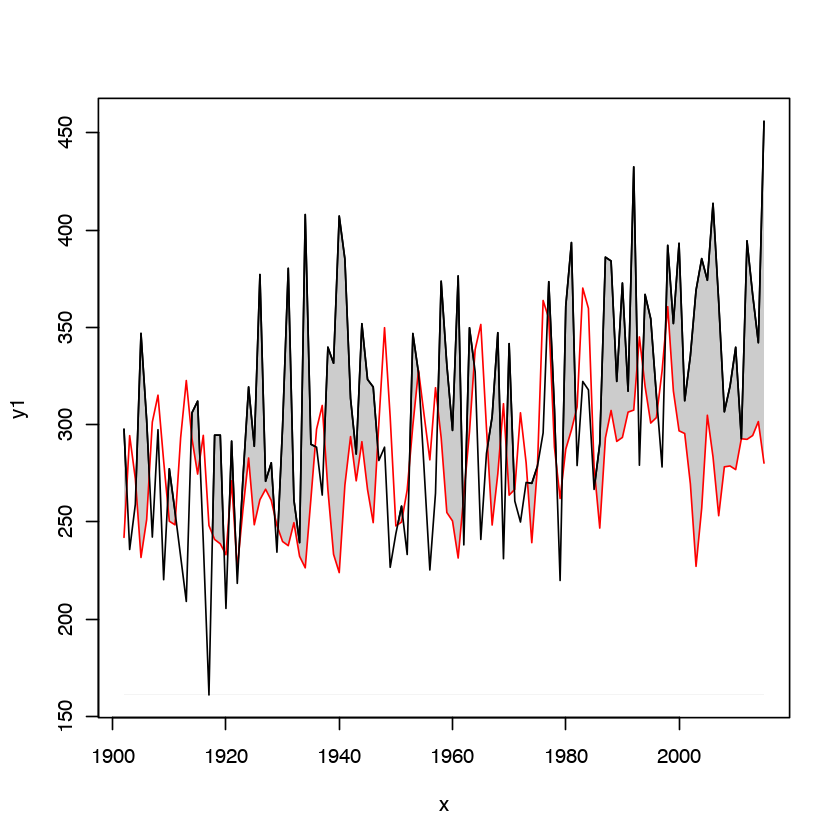

In [50]:
x <- tmean$yrs
n <- length(x)
#y1 <- tmean$x
y1 <- y3
y2 <- summerP2$x
min.y <- min(y1, y2)
max.y <- max(y1, y2)
plot(x, y1, type='l', ylim=c(range(min.y, max.y)))
polygon(c(x, rev(x)), 
        c(y1, rep(min.y, n)), 
        col=rgb(0, 0, 0, 0.2), 
        border=rgb(0, 0, 0, 0))
polygon(c(x, rev(x)), 
        c(y2, rep(min.y, n)), 
        col='white', 
        border=rgb(0, 0, 0, 0))
lines(x, y2, col=2)
lines(x, y1)

In [21]:
png(paste0(out, "beetle_grids_0.png"), width=12, height=6, units="in", res=300)
par(mar = c(4,4.5,2,4.5))
with(tmean, plot(yrs, x, type="l", col=rgb(80.4/100, 0, 0, 0.6), lwd=2, cex.lab=1.5,
             xlab="Year", main="Long-term climate in the MPB-affected areas",
             ylab=""))
#abline(h=mean(tmean$x), col=rgb(80.4/100, 0, 0, 0.7), lwd=2.5)
axis(side = 2, col="red3", col.axis="red3")
mtext(side = 2, line = 3, "Mean temperature", cex=1.5, col="red3")
par(new = T)
with(summerP2, plot(yrs, x, type="l", col=rgb(0, 0, 80.4/100, 0.6), lwd=2, axes=F, xlab=NA, ylab=NA, cex.lab=1.5))
#abline(h=mean(summerP2$x), col=rgb(0, 0, 80.4/100, 0.7), lwd=2.5)
axis(side = 4, col="blue3", col.axis="blue3")
mtext(side = 4, line = 3, "Cumulative summer precipitation", cex=1.5, col="blue3")
par(new = T)
with(btl.grids, plot(time, btl.t, pch=19, axes=F, xlab=NA, ylab=NA))
axis(side = 4, at = seq(5000, 14000, by = 2600))
# mtext(side = 4, line = 3, substitute(paste("Number of grid cells (",10^3,")")))
#text(btl.t ~time, labels=btl.t, data=btl.grids, cex=0.8, font=2)

legend("topleft",
       legend=c("Annual mean temperature (°C)", "Two-year cumulative summer precipitation (mm)", "Number of MPB-affected grid cells"),
       lty=c(1,1,0), pch=c(NA, NA, 19), lwd=2, col=c("red3", "blue3", "black"), bty = "n")
dev.off()

pdf 
  2

In [23]:
png(paste0(out, "beetle_grids_1.png"), width=12, height=6, units="in", res=300)
par(mar = c(4,4.5,2,4.5))
with(tmean, plot(yrs, x, type="l", col="red3", lwd=2, cex.lab=1.5,
             xlab="Year", main="Long-term climate in the MPB-affected areas",
             ylab=""))
abline(h=mean(tmean$x), col=rgb(80.4/100, 0, 0, 0.4), lwd=2.5)
axis(side = 2, col="red3", col.axis="red3")
mtext(side = 2, line = 3, "Mean temperature", cex=1.5, col="red3")
legend("topleft",
       legend="Annual mean temperature (°C)",
       lty=1, lwd=2, col="red3", bty = "n")
dev.off()

pdf 
  2

In [26]:
png(paste0(out, "beetle_grids_2.png"), width=12, height=6, units="in", res=300)
par(mar = c(4,4.5,2,4.5))
with(tmean, plot(yrs, x, type="l", col=rgb(80.4/100, 0, 0, 0.3), lwd=2, cex.lab=1.5,
             xlab="Year", main="Long-term climate in the MPB-affected areas",
             ylab=""))
#abline(h=mean(tmean$x), col=rgb(80.4/100, 0, 0, 0.4), lwd=2.5)
axis(side = 2, col="red3", col.axis="red3")
mtext(side = 2, line = 3, "Mean temperature", cex=1.5, col="red3")
par(new = T)
with(summerP2, plot(yrs, x, type="l", col="blue3", lwd=2, axes=F, xlab=NA, ylab=NA, cex.lab=1.5))
abline(h=mean(summerP2$x), col=rgb(0, 0, 80.4/100, 0.4), lwd=2.5)
axis(side = 4, col="blue3", col.axis="blue3")
mtext(side = 4, line = 3, "Cumulative summer precipitation", cex=1.5, col="blue3")
legend("topleft",
       legend=c("Annual mean temperature (°C)", "Two-year cumulative summer precipitation (mm)"),
       lty=c(1,1), lwd=2, col=c("red3", "blue3"), bty = "n")
dev.off()

pdf 
  2